<a href="https://colab.research.google.com/github/PYthegr8/ML/blob/main/Optimization_with_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
dataset = tf.keras.datasets.cifar10
(training_images, training_labels), (test_images, test_labels) = dataset.load_data()
training_images=training_images / 255.0
test_images=test_images/255.0
training_images.shape

170498071/170498071 [==============================] - 5s 0us/step


(50000, 32, 32, 3)

In [ ]:
test_images.shape

(10000, 32, 32, 3)

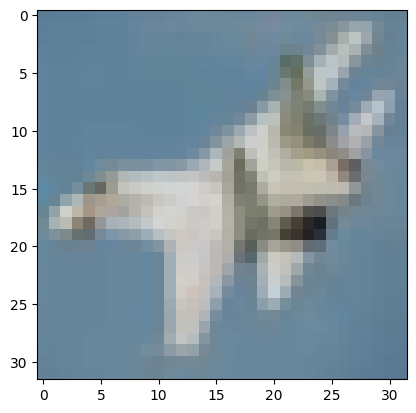

In [ ]:
sample_image = test_images[10, :, :, :]
plt.imshow(sample_image)

# Experiments

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 flatten_2 (Flatten)         (None, 14400)             0         
                                                                 
 dense_2 (Dense)             (None, 10)                144010    
                                                                 
Total params: 144458 (564.29 KB)
Trainable params: 144458 (564.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(training_images, training_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.8114 - accuracy: 0.3630 - val_loss: 1.7053 - val_accuracy: 0.3888
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5761 - accuracy: 0.4535 - val_loss: 1.5550 - val_accuracy: 0.4536
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4503 - accuracy: 0.4952 - val_loss: 1.4308 - val_accuracy: 0.4869
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3580 - accuracy: 0.5265 - val_loss: 1.3704 - val_accuracy: 0.5217
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2927 - accuracy: 0.5495 - val_loss: 1.2912 - val_accuracy: 0.5438
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2523 - accuracy: 0.5658 - val_loss: 1.2838 - val_accuracy: 0.5481
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2175 - accuracy: 0.5783 - val_loss: 1.3008 - val_accuracy:

## Adding a dense layer 128 neurons

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=10, validation_data=(test_images, test_labels))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 flatten_4 (Flatten)         (None, 14400)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               1843328   
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1845066 (7.04 MB)
Trainable params: 1845066 (7.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.8269 - accuracy: 0.3486 - val_loss: 1.6079 - val_accuracy: 0.4236
Epoc

## Adding MaxPooling Layer

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=10, validation_data=(test_images, test_labels))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 16)        0         
 D)                                                              
                                                                 
 flatten_5 (Flatten)         (None, 3600)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               460928    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 462666 (1.76 MB)
Trainable params: 462666 (1.76 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

## Adding more Conv2D and MaxPooling2D layers

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=10, validation_data=(test_images, test_labels))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 16)          0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 576)               0         
                                                                 
 dense_10 (Dense)            (None, 128)              

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
      tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=10, validation_data=(test_images, test_labels))

ValueError: Exception encountered when calling layer "conv2d_13" (type Conv2D).

Negative dimension size caused by subtracting 3 from 2 for '{{node conv2d_13/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_13/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,16], [3,3,16,16].

Call arguments received by layer "conv2d_13" (type Conv2D):
  • inputs=tf.Tensor(shape=(None, 2, 2, 16), dtype=float32)

# Task

Try to experiment more with number of Convolutional and Dense layers

## Increasing filter sizes

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (7, 7), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(16, (7, 7), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=10, validation_data=(test_images, test_labels))

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 16)        2368      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 7, 7, 16)          12560     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 3, 3, 16)          0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 144)               0         
                                                                 
 dense_14 (Dense)            (None, 128)              

In [ ]:
model.fit(training_images, training_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2272 - accuracy: 0.5622 - val_loss: 1.2424 - val_accuracy: 0.5543
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1986 - accuracy: 0.5724 - val_loss: 1.2137 - val_accuracy: 0.5680
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1723 - accuracy: 0.5832 - val_loss: 1.2845 - val_accuracy: 0.5488
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1558 - accuracy: 0.5899 - val_loss: 1.2150 - val_accuracy: 0.5726
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1357 - accuracy: 0.5975 - val_loss: 1.3143 - val_accuracy: 0.5406
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1180 - accuracy: 0.6012 - val_loss: 1.1590 - val_accuracy: 0.5909
Epoch 7/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.0987 - accuracy: 0.6107 - val_loss: 1.1683 - val_accurac

KeyboardInterrupt: 

## Increase number of filters to 32

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (7, 7), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (7, 7), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=10, validation_data=(test_images, test_labels))

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 32)        4736      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 7, 7, 32)          50208     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 3, 3, 32)          0         
 ng2D)                                                           
                                                                 
 flatten_10 (Flatten)        (None, 288)               0         
                                                                 
 dense_16 (Dense)            (None, 128)             

## Going to (3, 3) filter size

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=30, validation_data=(test_images, test_labels))

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 6, 6, 32)          0         
 ng2D)                                                           
                                                                 
 flatten_12 (Flatten)        (None, 1152)              0         
                                                                 
 dense_20 (Dense)            (None, 128)             

## Running for 30 epochs

#

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=30, validation_data=(test_images, test_labels))

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 6, 6, 32)          0         
 ng2D)                                                           
                                                                 
 flatten_13 (Flatten)        (None, 1152)              0         
                                                                 
 dense_22 (Dense)            (None, 128)             

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=30, validation_data=(test_images, test_labels))

## What happens when you change batch size?

## What happens when you change the number of epochs

## What happens when you change the learning rate?

## How do you change learning rate?

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='RMSProp', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=10, validation_data=(test_images, test_labels))

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 6, 6, 32)          0         
 ng2D)                                                           
                                                                 
 flatten_14 (Flatten)        (None, 1152)              0         
                                                                 
 dense_24 (Dense)            (None, 128)             

## Using RMSProp with the baseline model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='RMSProp', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=10, validation_data=(test_images, test_labels))

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 flatten_15 (Flatten)        (None, 14400)             0         
                                                                 
 dense_26 (Dense)            (None, 10)                144010    
                                                                 
Total params: 144458 (564.29 KB)
Trainable params: 144458 (564.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1563/1563 [==============================] - 8s 4ms/step - loss: 1.5623 - accuracy: 0.4528 - val_loss: 1.4213 - val_accuracy: 0.5024
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2830 - accuracy: 0.5598 - val_loss: 1.3695 - val_accura

## Using Adam instead of RMSProp

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=10, validation_data=(test_images, test_labels))

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 6, 6, 32)          0         
 ng2D)                                                           
                                                                 
 flatten_16 (Flatten)        (None, 1152)              0         
                                                                 
 dense_27 (Dense)            (None, 128)             